In [133]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [134]:
# importing the required packages.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [135]:
# importing the csv file to a dataframe loan
loan= pd.read_csv('loan.csv')

In [136]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [137]:
# make sure that number of duplicate rows are zero -> here ID is unique id assigned to each loan listed.

sum(loan.duplicated(subset='id'))==0

True

In [138]:
# checking the duplicates

sum(loan.duplicated(subset='member_id'))==0

True

In [139]:
# dimensions of the dataframe
loan.shape

(39717, 111)

### check for NA values in dataset

In [140]:
print (loan.isnull().sum())  
print (loan.isnull().values.any())
print (loan.isnull().values.sum())

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


### checking the % of NAs columnwise

In [141]:
round((loan.isnull().sum()/len(loan.index))*100,2)

id                                  0.00
member_id                           0.00
loan_amnt                           0.00
funded_amnt                         0.00
funded_amnt_inv                     0.00
term                                0.00
int_rate                            0.00
installment                         0.00
grade                               0.00
sub_grade                           0.00
emp_title                           6.19
emp_length                          2.71
home_ownership                      0.00
annual_inc                          0.00
verification_status                 0.00
issue_d                             0.00
loan_status                         0.00
pymnt_plan                          0.00
url                                 0.00
desc                               32.58
purpose                             0.00
title                               0.03
zip_code                            0.00
addr_state                          0.00
dti             

#### As there are many columns which have 100% null values, we will drop those columns first.

In [142]:
# one way to drop as all columns are not showing in the above result.

null_col=round((loan.isnull().sum()/len(loan.index))*100,2)
drop_col=null_col[null_col>=100].index
print(drop_col)

Index(['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dl

In [143]:
# now dropping all those columns

loan=loan.drop(drop_col,axis=1)

In [8]:
# amother way of dropping columns where we can cross check with csv file and drop those columns

loan=loan.drop(['mths_since_last_major_derog',
                 'annual_inc_joint', 'dti_joint', 'verification_status_joint',
                'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m',
               'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
               'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m',
               'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
               'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths',
               'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
                'mo_sin_old_il_acct',
               'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
               'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
               'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
               'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
               'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
               'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats',
               'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
               'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75',
                'tot_hi_cred_lim',
               'total_bal_ex_mort', 'total_bc_limit',
               'total_il_high_credit_limit'             
               ],axis=1)

In [144]:
# dropping columns which are not useful for analysis.
loan=loan.drop(['desc',
                'title',
                'policy_code',
                'application_type',
                'acc_now_delinq' ,  
                'delinq_amnt',
                'total_pymnt_inv',
                 'collection_recovery_fee',
                 'mths_since_last_delinq',
                 'mths_since_last_record',
                'pub_rec',
                 'total_acc',
                'initial_list_status',
                'collections_12_mths_ex_med',
                 'chargeoff_within_12_mths',
                'tax_liens'
               ],axis=1)

### Converting few columns to Lowercase

In [145]:
loan.verification_status=loan.verification_status.str.lower()
loan.loan_status=loan.loan_status.str.lower()
loan.purpose=loan.purpose.str.lower()

In [146]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 41 columns):
id                      39717 non-null int64
member_id               39717 non-null int64
loan_amnt               39717 non-null int64
funded_amnt             39717 non-null int64
funded_amnt_inv         39717 non-null float64
term                    39717 non-null object
int_rate                39717 non-null object
installment             39717 non-null float64
grade                   39717 non-null object
sub_grade               39717 non-null object
emp_title               37258 non-null object
emp_length              38642 non-null object
home_ownership          39717 non-null object
annual_inc              39717 non-null float64
verification_status     39717 non-null object
issue_d                 39717 non-null object
loan_status             39717 non-null object
pymnt_plan              39717 non-null object
url                     39717 non-null object
purpose           

### convert  columns to datetime oject

In [147]:
loan.issue_d=pd.to_datetime(loan.issue_d,format='%b-%y')

In [148]:
loan.earliest_cr_line= pd.to_datetime(loan.earliest_cr_line,format='%b-%y')

In [149]:
loan.last_pymnt_d=pd.to_datetime(loan.last_pymnt_d,format='%b-%y')

In [150]:
loan.next_pymnt_d = pd.to_datetime(loan.next_pymnt_d,format='%b-%y')

In [151]:
loan.last_credit_pull_d = pd.to_datetime(loan.last_credit_pull_d,format='%b-%y')

#### Handling Data quality and Manipulation of few other columns

In [152]:
# Replacing months string in term column with empty space to convert column into "int" type

loan['term']=loan['term'].astype(str).str.replace('months','').astype(int)

In [153]:
#  Replacing special char '%' in int_rate,revol_util column with empty space and converting column to 'float' type

loan['int_rate']=loan['int_rate'].str.replace('%','').astype(float)

loan['revol_util']=loan['revol_util'].str.replace('%','').astype(float)

In [154]:
# creating new column which gives the date by which loan period terminates.

loan['finish_loan']=loan.apply(lambda x: x['issue_d']+pd.DateOffset(months=1)+
                                     pd.offsets.MonthEnd(x['term'])+ pd.DateOffset(days=1),axis=1)

In [155]:
# Extracting year from issue_year and last_payment year

loan['issue_year']=loan.issue_d.dt.year
loan['last_payment_year']=loan.last_pymnt_d.dt.year

In [156]:
# rounding of few columns to 2 decimals.

loan['funded_amnt_inv']=round(loan['funded_amnt_inv'],2)
loan['total_pymnt']=round(loan['total_pymnt'],2)

In [157]:
# All the 4 columns add up to value equal to total_payment column in dataframe. so we can replace this 4 columns as one column 
# or just drop those columns as we have total_payment column already in place of all 4 columns sum.

# total_rec_prncp	total_rec_int	total_rec_late_fee	recoveries

# Below result tells that there is no difference between addup of 4 columns and total_payment column. so we can drop those
# 4 columns.

df=(round(loan['total_rec_prncp']+loan['total_rec_int']+loan['total_rec_late_fee']+loan['recoveries'],2)
    -round(loan['total_pymnt'],2))
df[df==1.0]


Series([], dtype: float64)

In [158]:
loan= loan.drop(['total_rec_prncp',
                'total_rec_int',
                'total_rec_late_fee',
                'recoveries'
                ],axis=1)

In [159]:
# manipulating emp_length column

# considering 10+ years also to value 10 and <1 year equal to 0 as per the data dictionary file.

loan['emp_length']=loan['emp_length'].str.replace('years','')
loan['emp_length']=loan['emp_length'].str.replace('year','')
loan['emp_length']=loan['emp_length'].str.replace('+','')
loan['emp_length']=loan['emp_length'].str.replace('< 1','0')

In [160]:
# cross-checking of NaN values in emp_length
loan['emp_length'].isnull().sum()

1075

We are not imputing any value to emp_length with some mean value just to make sure we dont impute applicant with wrong experience. so treating them as missing values.

In [161]:
# converting to float type as we cant convert to int because there are NaN values in emp_length
loan['emp_length']=loan['emp_length'].astype(float)

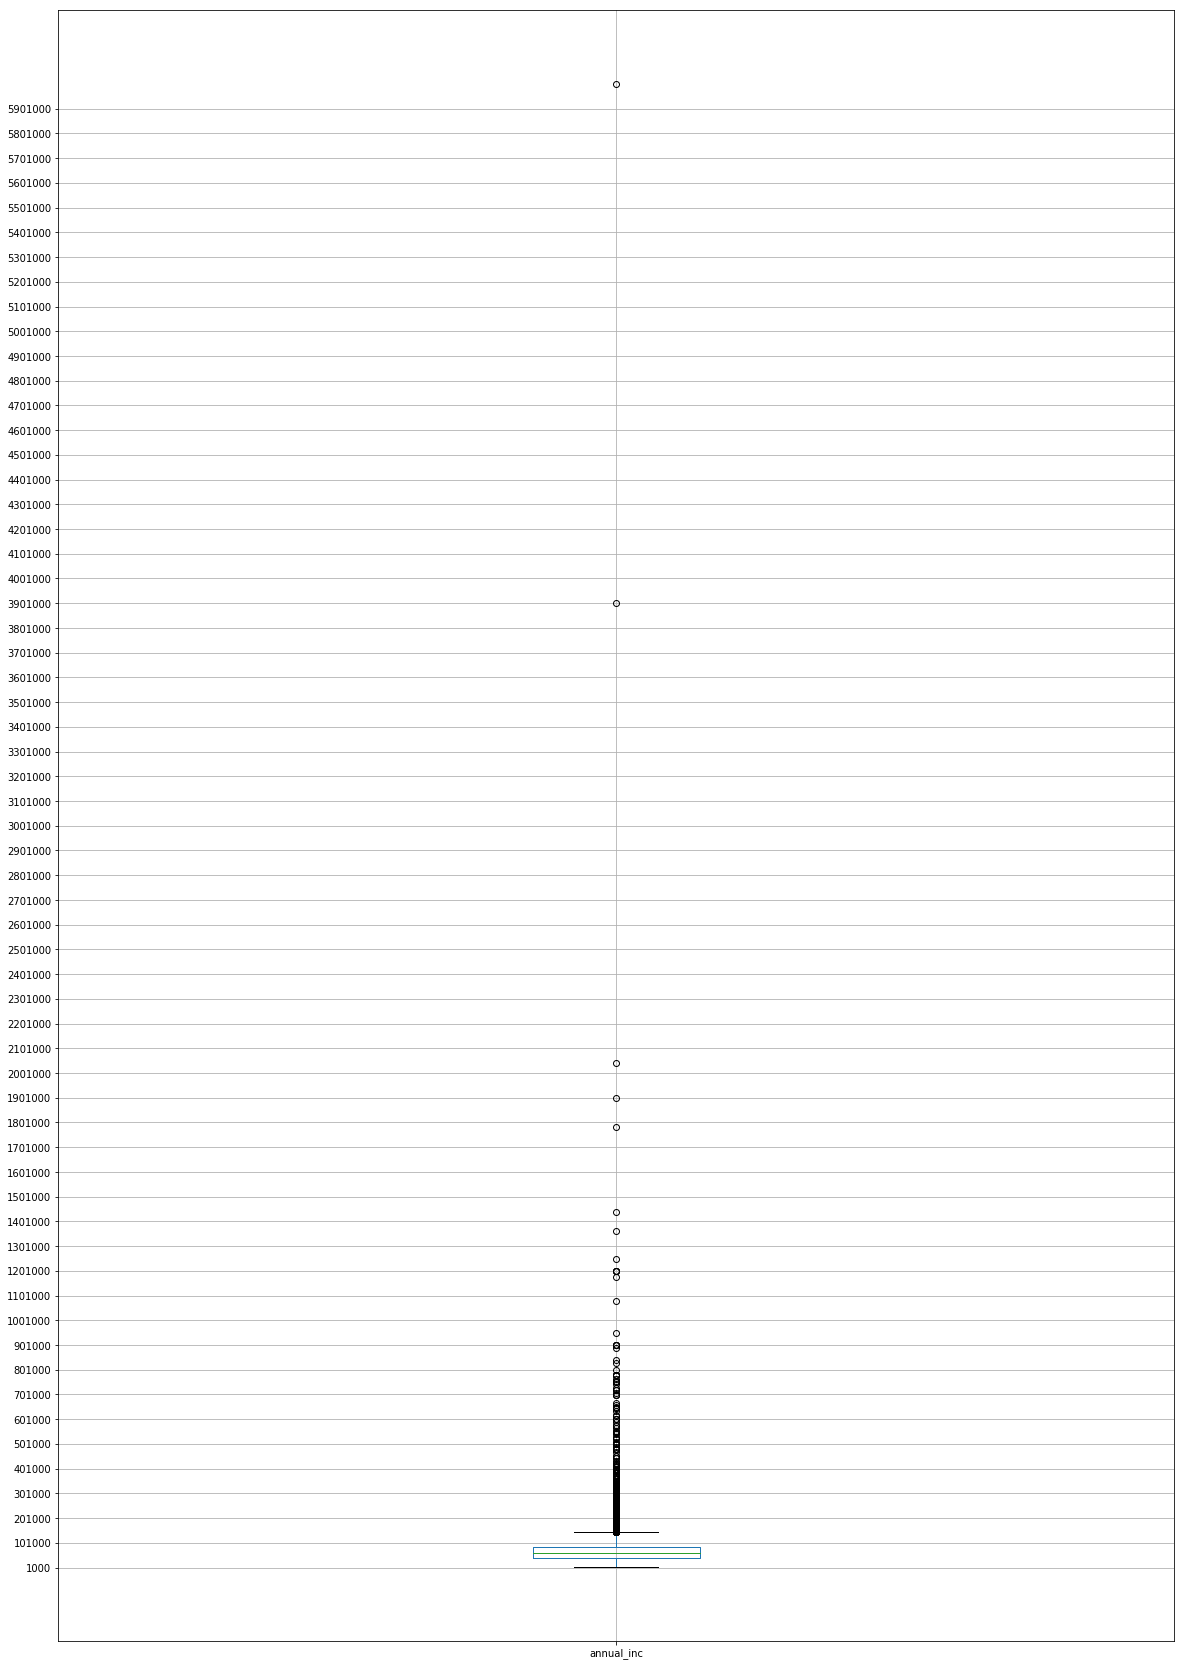

In [162]:
# To get to know about the outlier values in income of borrower

plt.figure(figsize=(20,30))
loan.boxplot(column=['annual_inc'])
plt.yticks(np.arange(1000,6000000,100000))
plt.show()

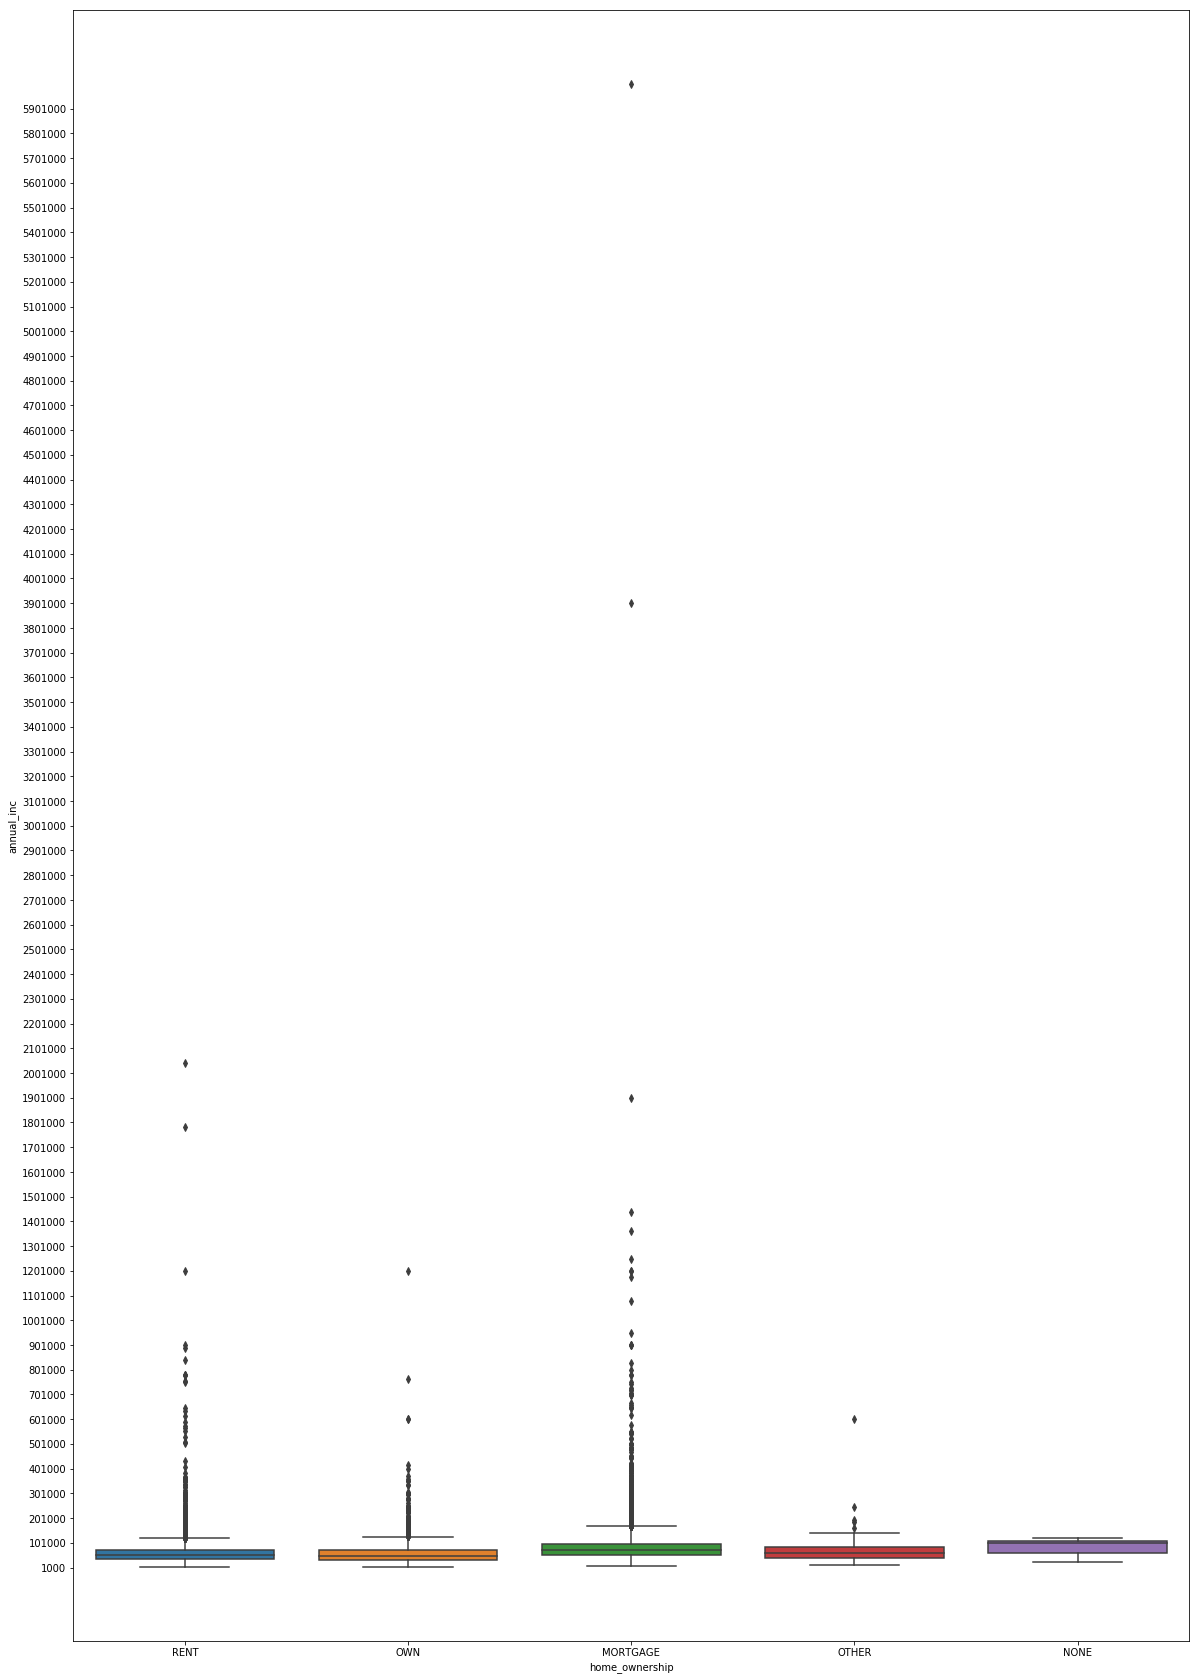

In [163]:
# To get to know about the outlier values in income of borrower per each category of home_ownership

plt.figure(figsize=(20,30))
sns.boxplot(y=loan['annual_inc'],x=loan['home_ownership'])
plt.yticks(np.arange(1000,6000000,100000))
plt.show()

As we can see from above the two plots there are outliers exists in annual income values. So i am considering here to remove the outlier values in annual income column i.e I am removing the rows that are having income value >=1000000 as we can observe from above, most extreme values exists after that value i.e there is huge difference in income values from that point and some other values above 75th percentile also outliers but they are close to 75th percentile. I am considering the outlier values like values >=1000000.

In [164]:
# retaining only rows with annual_inc <1000000 as otherwise thinking those extreme values results in different analysis.
loan=loan.loc[loan.annual_inc <1000000]

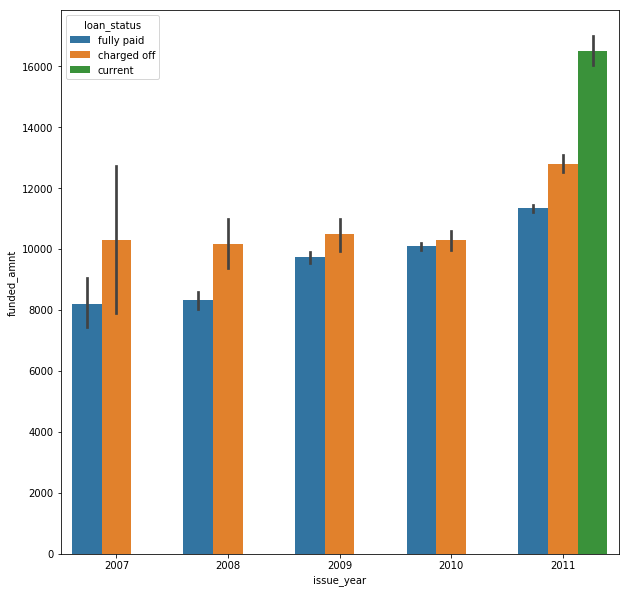

In [165]:
plt.figure(figsize=(10,10))
sns.barplot(x=loan['issue_year'],y=loan['funded_amnt'],hue=loan['loan_status'])
plt.yticks()
plt.show()

The above plot tells that there are more loans subjected to chargedoff or defaulting which are issued in year 2011. In 2007,2008,2009,2010 issued loans, there are more default loans than the fully paid loans.

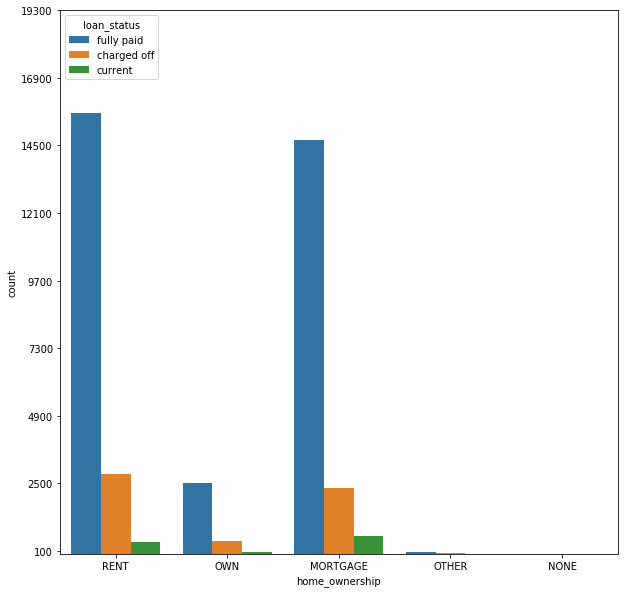

In [166]:
# Below plot shows which home_ownership status are more risk to defaulting 

plt.figure(figsize=(10,10))
sns.countplot(loan['home_ownership'],hue=loan['loan_status'])
plt.yticks(np.arange(100,20000,2400))
plt.show()

Above plot shows more defualting of loans occur in loans accepted for Mortagage and Rent type.

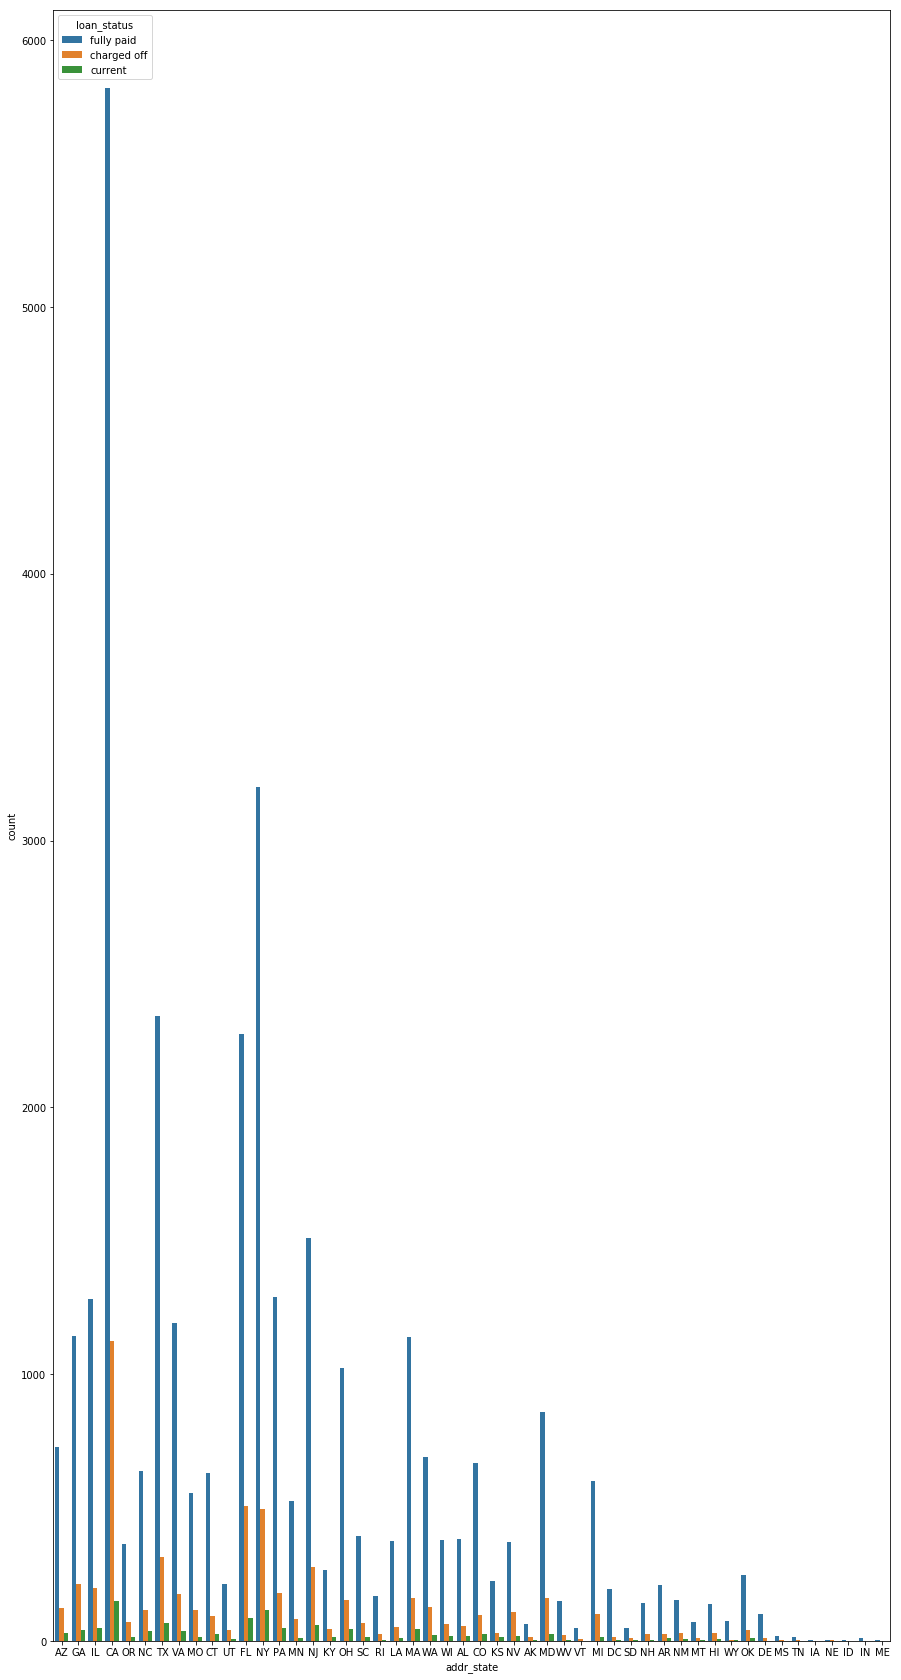

In [167]:
# plot shows the statewise trends on loan status

plt.figure(figsize=(15,30))
sns.countplot(loan['addr_state'],hue=loan['loan_status'])
plt.show()

Above plot shows that in state CA,FL,NY,NJ and few other states there are more loans defaulted.IN few other states, loans accepted very less.

In [168]:
# dividing the annual_income of borrowers into  categories

def status(loan):
    if ((loan['annual_inc']>=1000) &(loan['annual_inc']<=50000)):
        earnings = 'low'
    elif ((loan['annual_inc']>50000) &(loan['annual_inc']<=100000)):
        earnings = 'average'
    elif ((loan['annual_inc']>100000) &(loan['annual_inc']<=1000000)):
        earnings = 'high'
    else:
        earnings = 'invalid value'
    return earnings
    
loan['earnings']=loan.apply(status,axis=1)

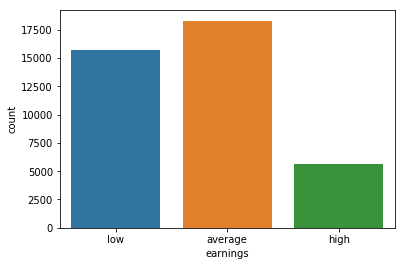

In [169]:
# Plot tells the trend of earnings of borrowers

sns.countplot(loan['earnings'])

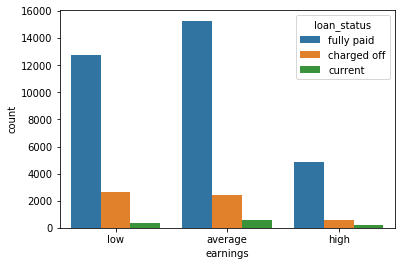

In [170]:
# Plot tells the trend of earnings of borrowers with respect to loan status. i.e. shows trend which income band(low,average,
# high) loans are creating doubts in clearing loans.
 

sns.countplot(loan['earnings'],hue=loan['loan_status'])
plt.show()

Above plot tells about the income band where there are more defaulters. so, Low and average earning bands are defaulting the loans

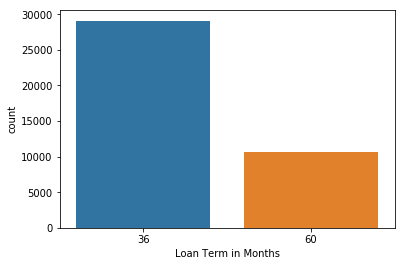

In [171]:
# plot tells about more loans taken for which period of time

# more Loans taken for 36 months period.

sns.countplot(loan['term'])
plt.xlabel('Loan Term in Months')
plt.show()

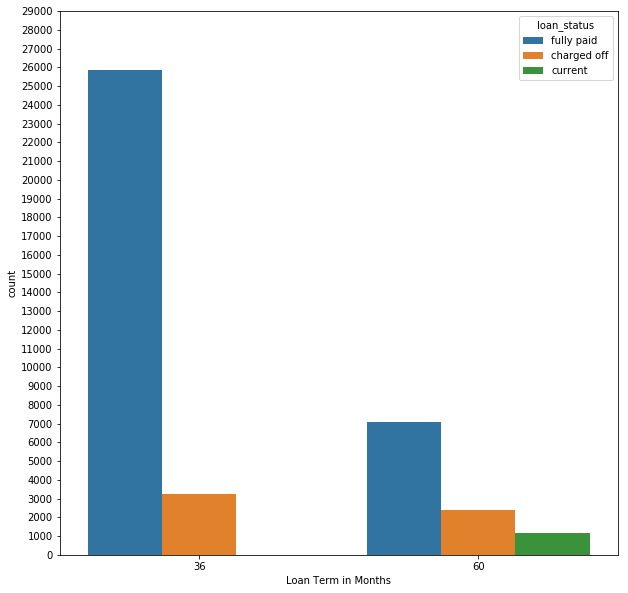

In [172]:
# plot shows which loan term are more subjected to risks i.e. being defaulted

plt.figure(figsize=(10,10))
sns.countplot(loan['term'],hue=loan['loan_status'])
plt.xlabel('Loan Term in Months')
plt.yticks(np.arange(0,30000,1000))
plt.show()

<Figure size 720x1440 with 0 Axes>

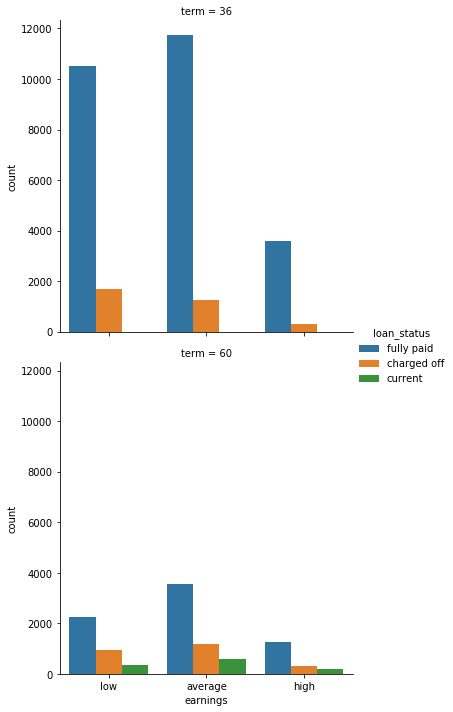

In [173]:
plt.figure(figsize=(10,20))
sns.catplot(x='earnings',hue='loan_status',row='term',data=loan,kind='count')
plt.show()

The above plot tells that lower and average earning income band are defaulting loans than higher income band. specifically,
the lower income band people taken for period of 36 months are defaulting loans more than period of 60 months. Average income band people taken for period 36 and 60 months are defaulting. If we see the loans that are currently processing, lower and average income band people are higher in process of paying loans and need to pay attention on them.

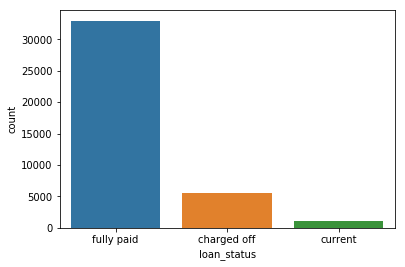

In [174]:
sns.countplot(loan['loan_status'])

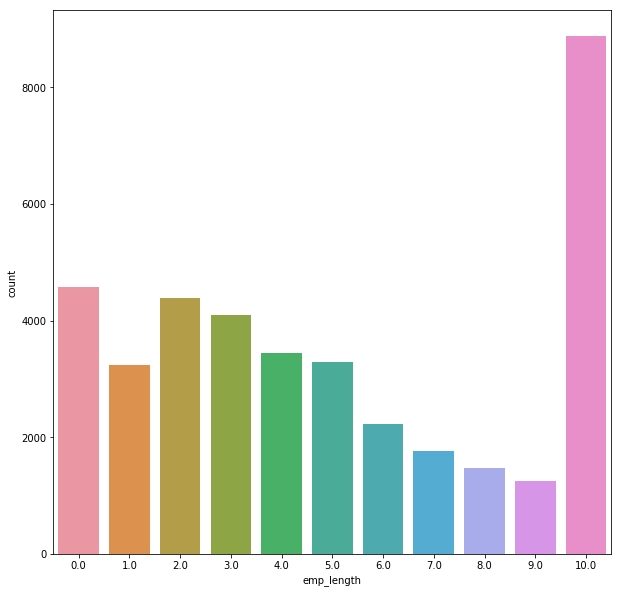

In [175]:
# employees under which experience taken more loans

plt.figure(figsize=(10,10))
sns.countplot(loan['emp_length'])
plt.show()

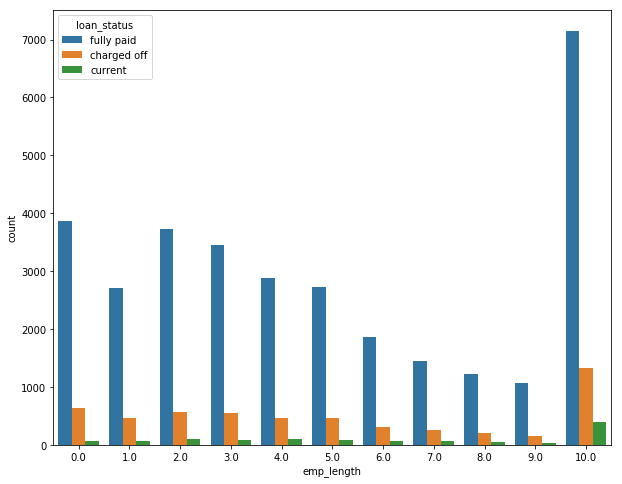

In [176]:
# loan status of different levels of experience of employees

plt.figure(figsize=(10,8))
sns.countplot(loan['emp_length'],hue=loan['loan_status'])
plt.show()

<Figure size 720x1440 with 0 Axes>

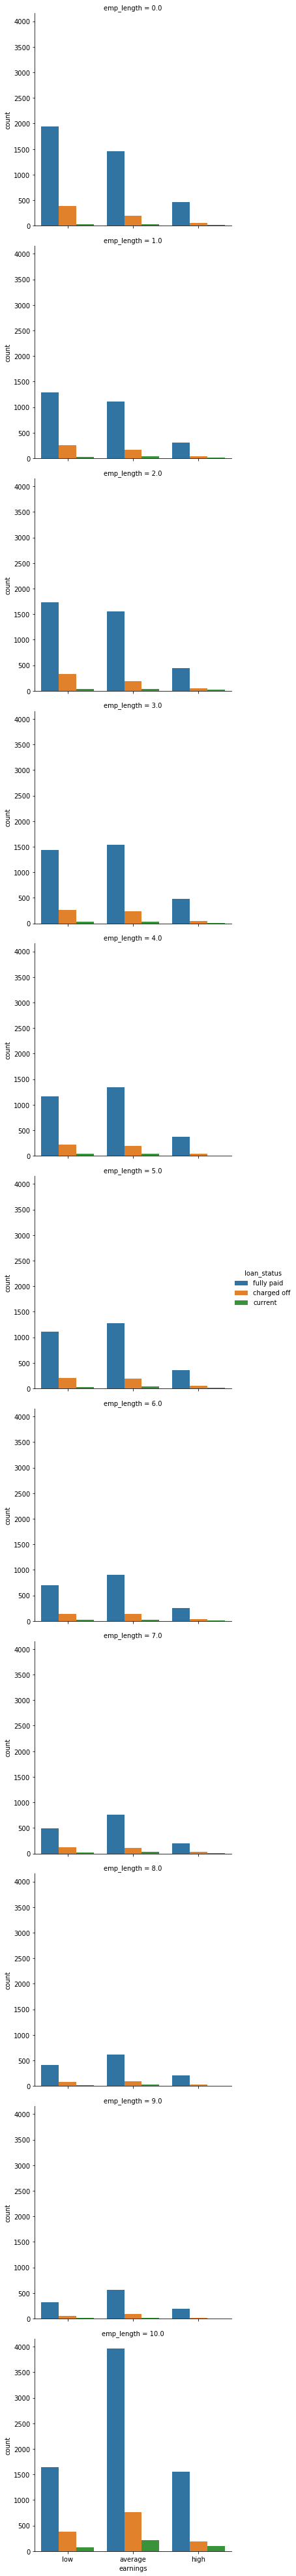

In [177]:
# loan status of different experienced employees of different earnings/income ranges

plt.figure(figsize=(10,20))
sns.catplot(x='earnings',hue='loan_status',row='emp_length',data=loan,kind='count')
plt.show()

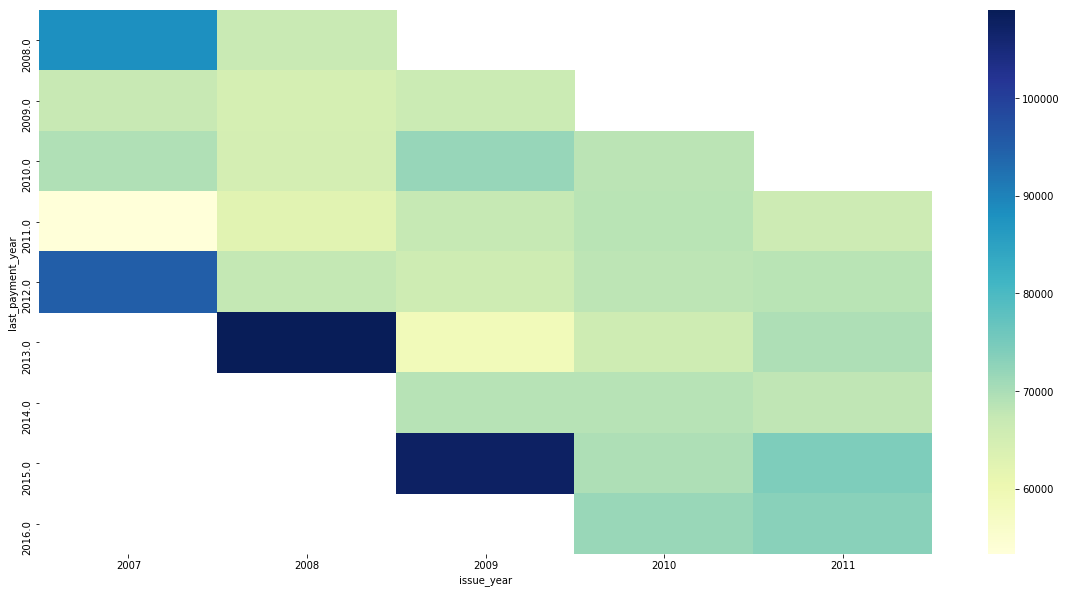

In [178]:
plt.figure(figsize=(20,10))
pv=pd.pivot_table(loan,values='annual_inc',columns='issue_year',index='last_payment_year',aggfunc='mean')
sns.heatmap(pv,cmap='YlGnBu')
plt.show()

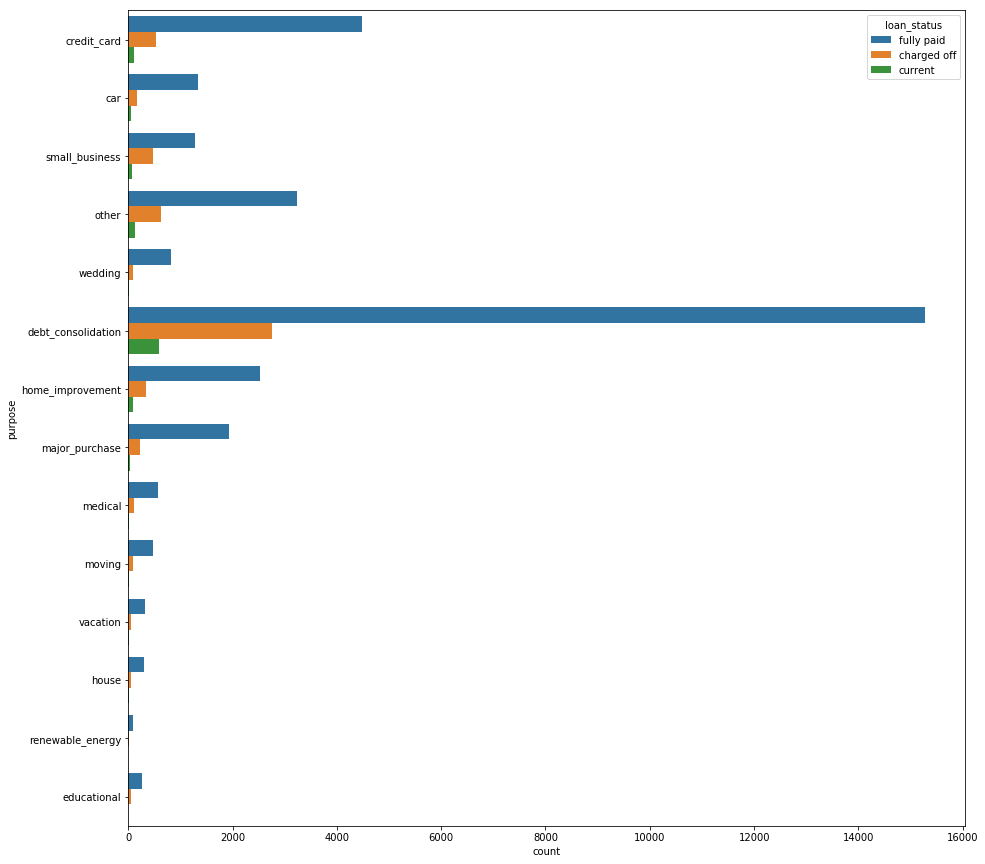

In [179]:
# plot tells on which purpose loans are taken more. More loans are taken for debt_consolidation are more subjected to defaulting
# loans. Loans taken for purpose of credit card,small business and other purpose also has more loans charged off or defaulted.

plt.figure(figsize=(15,15))
sns.countplot(y=loan['purpose'],hue=loan['loan_status'])
plt.show()

<Figure size 720x1440 with 0 Axes>

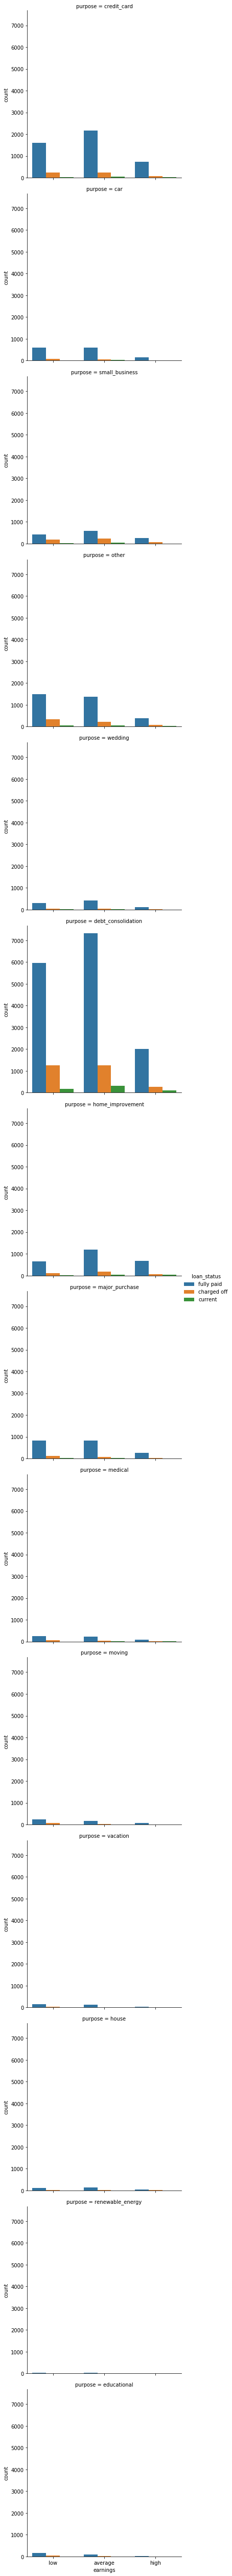

In [180]:
# plot shows loan status i.e. defaulted/fully paid of different earnings/income ranges of employees
# taken loans for different purposes

# can see from below plot that low and avergae income band employees are more defaulting taken loans for debt consolidation
# credit card and other purposes.

plt.figure(figsize=(10,20))
sns.catplot(x='earnings',hue='loan_status',row='purpose',data=loan,kind='count')
plt.show()

In [181]:
# dividing different emp_length into categories of experience

def experience(loan):
    if((loan['emp_length'] >=0.0) & (loan['emp_length'] <= 2.0)):
        exp='Beginner'
    elif((loan['emp_length'] >=3.0) & (loan['emp_length'] <= 5.0)):
        exp='Intermediate'
    elif((loan['emp_length'] >=6.0) & (loan['emp_length'] <= 9.0)):
        exp='Proficient'
    elif(loan['emp_length'] >=10.0):
         exp='Expert'
    else:
         exp= 'invalid experience given'
    return exp

loan['emp_level']=loan.apply(experience,axis=1)

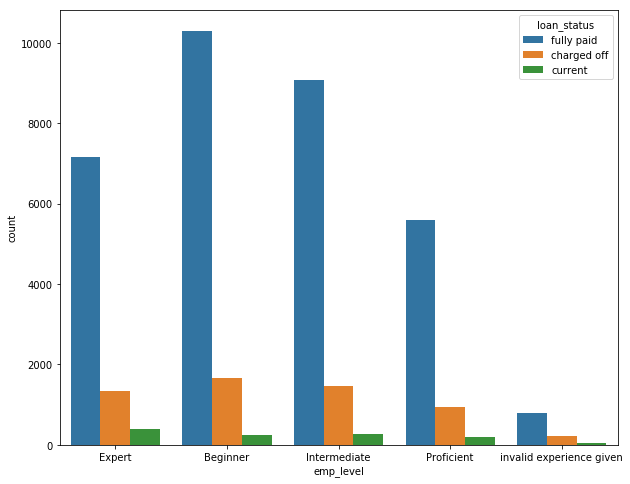

In [182]:
plt.figure(figsize=(10,8))
sns.countplot(loan['emp_level'],hue=loan['loan_status'])
plt.show()

<Figure size 720x1440 with 0 Axes>

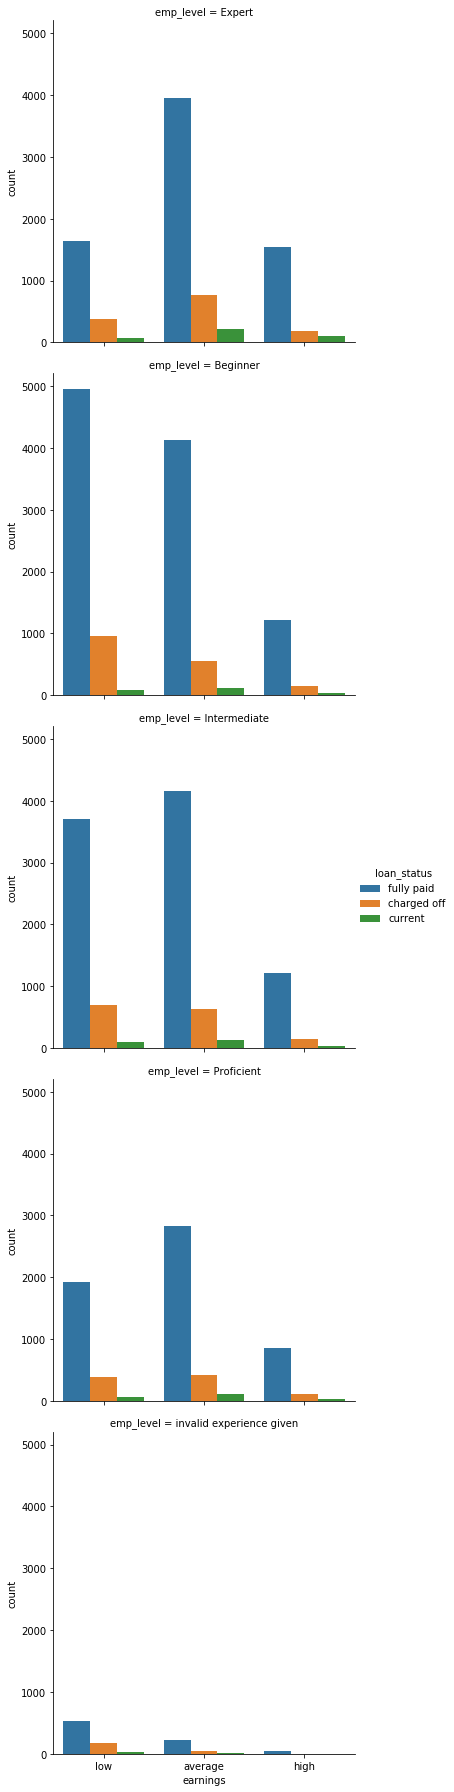

In [183]:
# we can see that Beginner and intermediate level employees who are in low and average income bands are more defaulting. Expert
# level employees are more defaulting belonging to average income band

plt.figure(figsize=(10,20))
sns.catplot(x='earnings',hue='loan_status',row='emp_level',data=loan,kind='count')
plt.show()

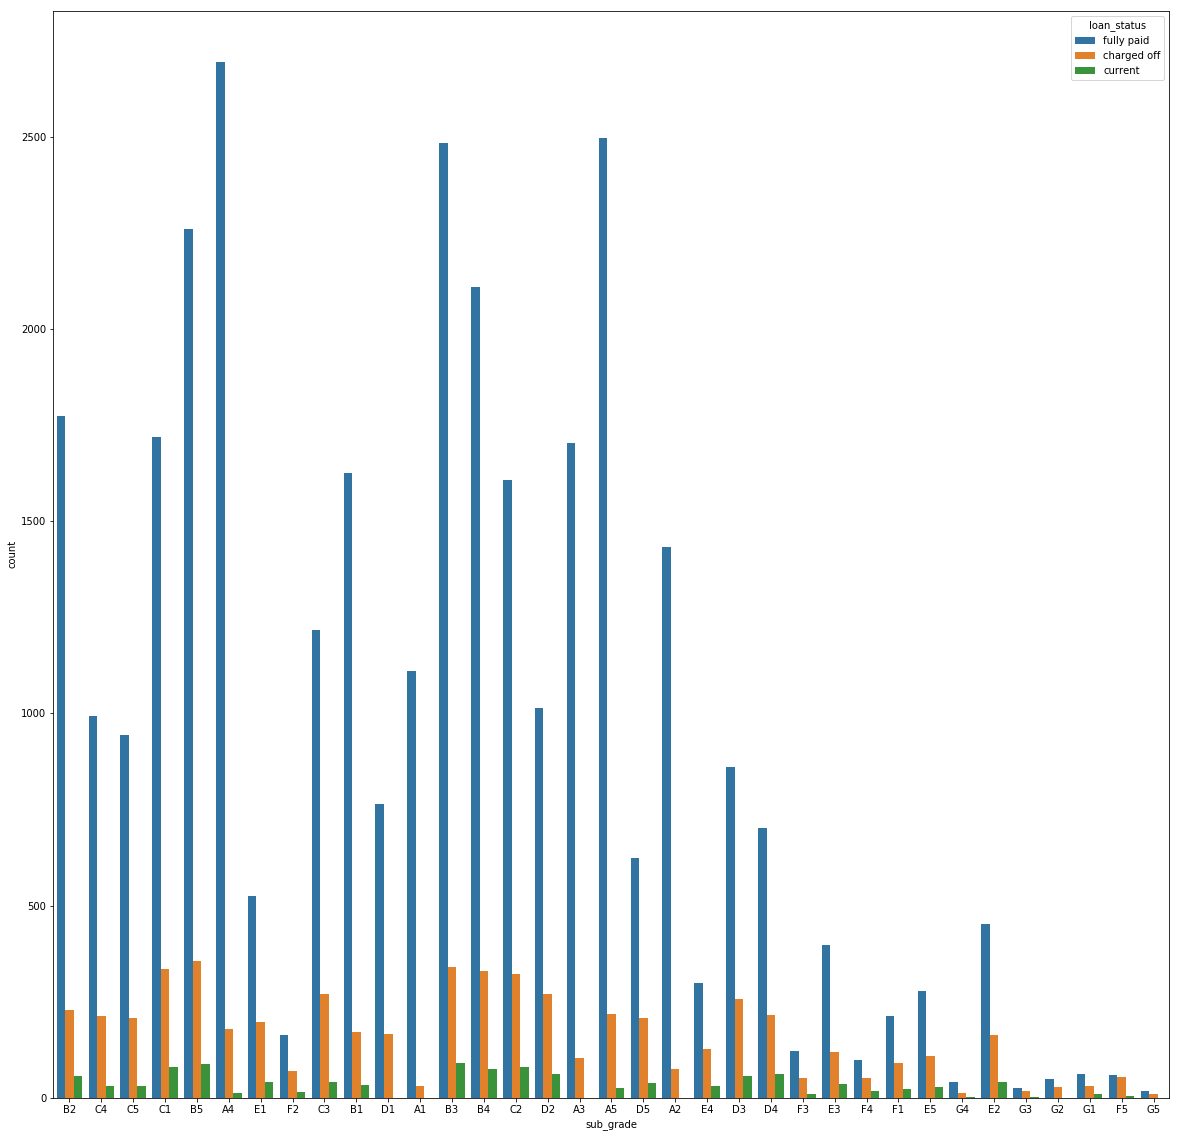

In [184]:
# plot shows what is loan status of loan applicants for whom loan is accepted based on their grades

plt.figure(figsize=(20,20))
sns.countplot(loan['sub_grade'],hue=loan['loan_status'])
plt.show()

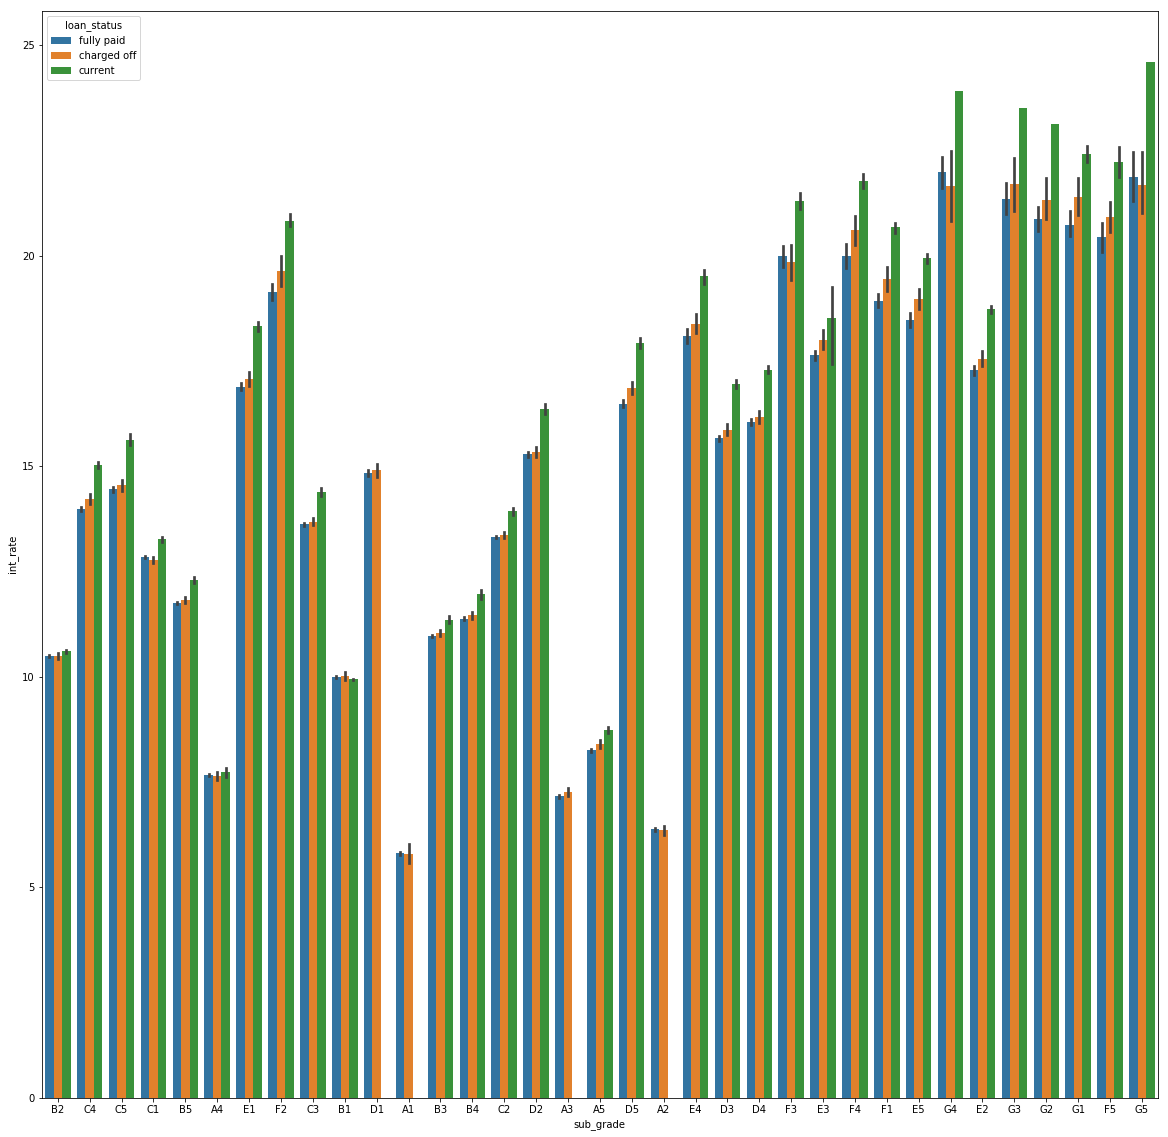

In [185]:
plt.figure(figsize=(20,20))
sns.barplot(x=loan['sub_grade'],y=loan['int_rate'],hue=loan['loan_status'])

A1 is best sub-grade and G5 is worst sub-grade with grades ranging from A to G. applicants with Best grade will receive loans with lower interest rate and applicants with worst grade will receive loans with higher interest rates. As we can see that sub-grades belong to grades E,F,G have got loans with more interest rates and they are defaulting/charged off more compared to people with grades A,B,C who got loans with lower interest rates and chance of defaulting is less.

As we get to know that main problem when loan gets accepted is default/charged off the loan i.e. not repaying the loan amount to the lender. so we can take the rows corresponding to CHARGEDOFF status and can easily observe in plots

In [186]:
loan_chargedoff=loan.loc[loan['loan_status']=='charged off']

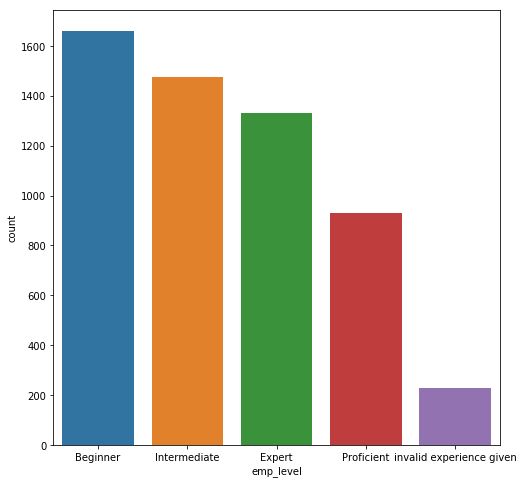

In [187]:
# plot showing that what employee level is more subjected to defaulting the loan.

plt.figure(figsize=(8,8))
sns.countplot(loan_chargedoff['emp_level'])

<Figure size 720x720 with 0 Axes>

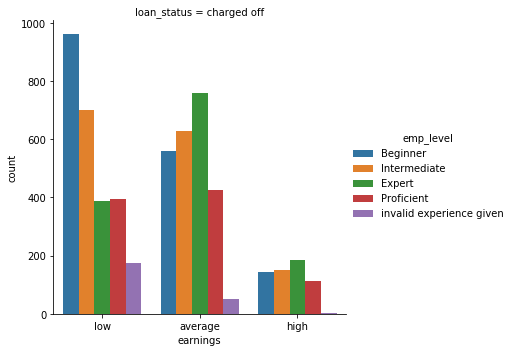

In [188]:
# plot showing which employee level of what income band is more subjected to defaulting loan.

# can observe below that beginner and intermediate level with low income are defaulting more nd expert, intermediate level with 
# average earnings are more defaulting.

plt.figure(figsize=(10,10))
sns.catplot(x='earnings',hue='emp_level',row='loan_status',data=loan_chargedoff,kind='count')
plt.show()

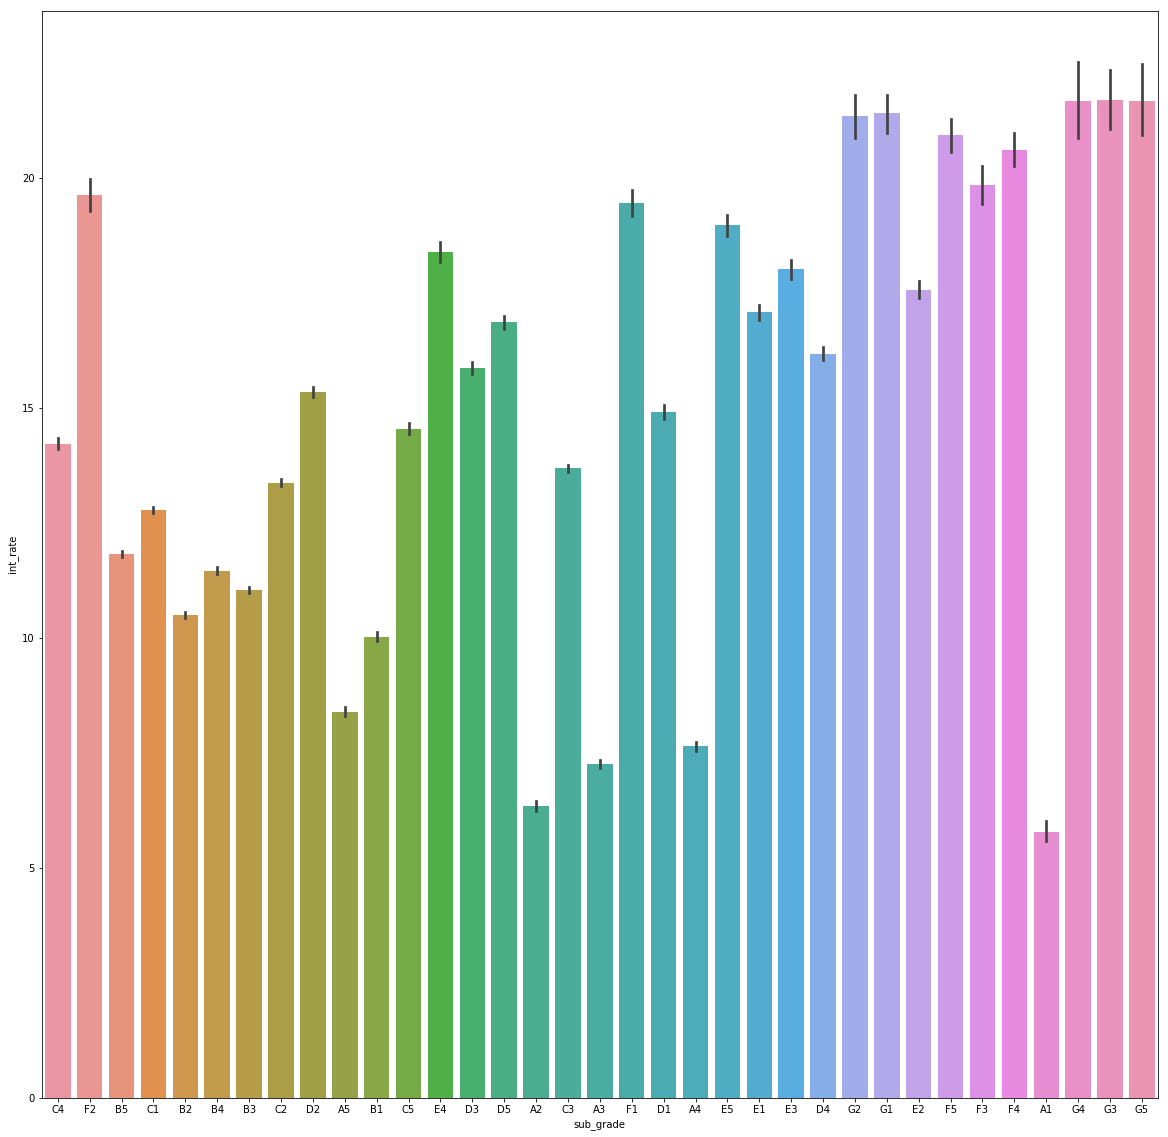

In [189]:
plt.figure(figsize=(20,20))
sns.barplot(x=loan_chargedoff['sub_grade'],y=loan_chargedoff['int_rate'])
plt.show()

In [190]:
# creating new metric which tells total amount to be paid of loan period

loan_chargedoff['Final_amt_tobe_paid']=loan_chargedoff['installment']*loan_chargedoff['term']

In [191]:
 # finding the loss_rate by taking loss amount created for each loan by total number of loan applications accepted.

loan_chargedoff['loss_rate']=round(((loan_chargedoff['Final_amt_tobe_paid']-loan_chargedoff['total_pymnt'])/
                              len(loan_chargedoff.index))*100,2)

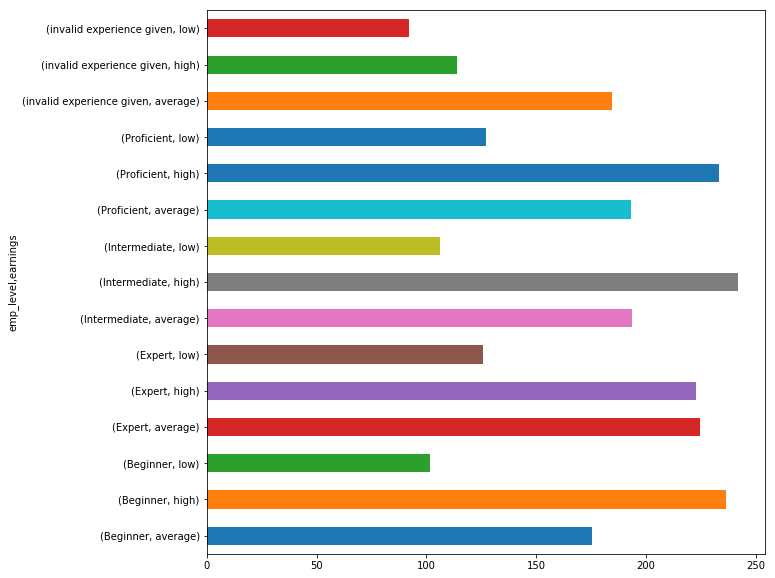

In [192]:
plt.figure(figsize=(10,10))
loan_chargedoff.groupby(['emp_level','earnings'])['loss_rate'].mean().plot(kind='barh')

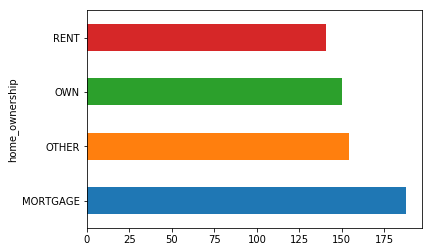

In [193]:
loan_chargedoff.groupby('home_ownership')['loss_rate'].mean().plot(kind='barh')

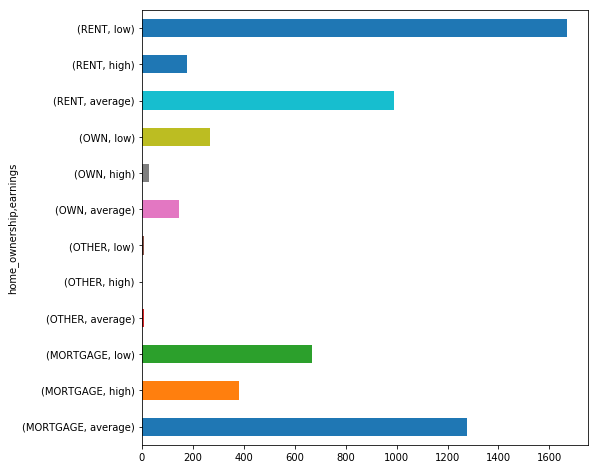

In [194]:
plt.figure(figsize=(8,8))
loan_chargedoff.groupby(['home_ownership','earnings'])['loss_rate'].count().plot(kind='barh')

From above plots we can observe that more charged off/ defaulting of loans occur mostly of  the employees with lower income band(includes average income band) with ownership mentioned  mortagage,own and other type with most of the begineer, intermediate level employees and purpose of loan like debt consolidation, small businesses, credit card are more subjected to defualting the loans.

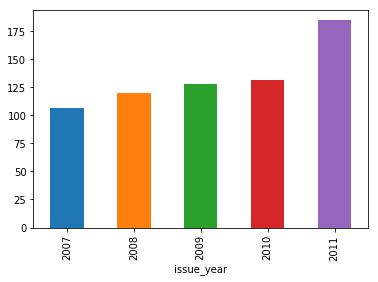

In [195]:
loan_chargedoff.groupby('issue_year')['loss_rate'].mean().plot(kind='bar')

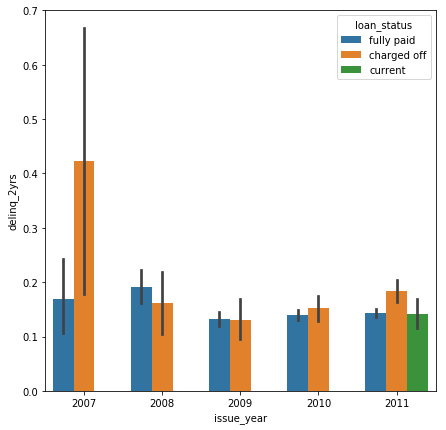

In [196]:
plt.figure(figsize=(7,7))
sns.barplot(y='delinq_2yrs',x='issue_year',hue='loan_status',data=loan)

by above plot, we can say more charged off loans happened also due to applicants with zero delinq history from 2yrs is more in years 2007 and 2011 issued loans

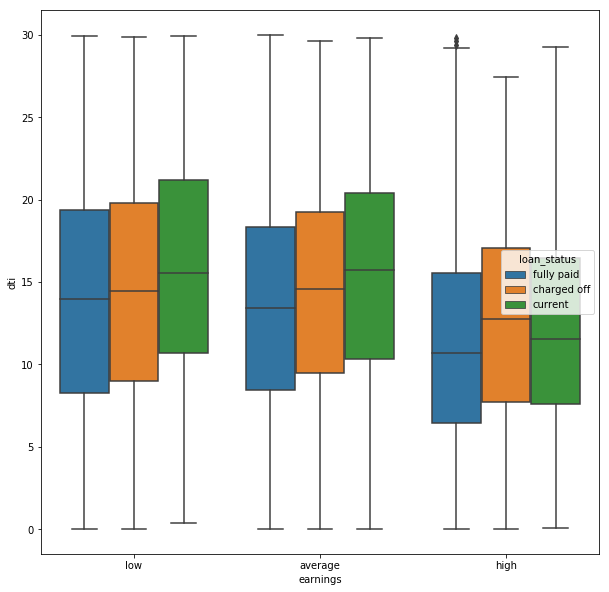

In [197]:
# Higher the DTI, lower the probability of repaying the loan and vice-versa

plt.figure(figsize=(10,10))
sns.boxplot(y=loan['dti'],x=loan['earnings'],hue=loan['loan_status'])

Above plot tells the same thing that lower and average income bands are more defaulting the loans comapared to higher band as the DTI of lower band is greater and higher than high income band. which means higher DTI , the lower probabaility of clearing loans.

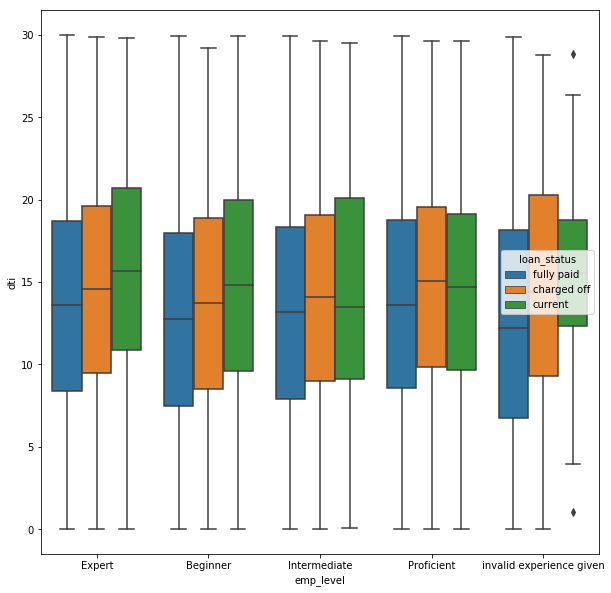

In [198]:
# loan status of the  DTI of emp_levels 
plt.figure(figsize=(10,10))
sns.boxplot(y=loan['dti'],x=loan['emp_level'],hue=loan['loan_status'])

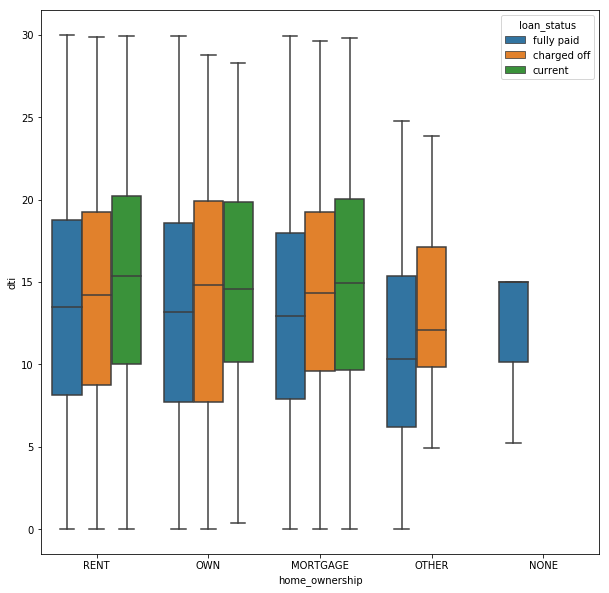

In [199]:
# loan status of different home_ownership mentioned according to DTI
plt.figure(figsize=(10,10))
sns.boxplot(y=loan['dti'],x=loan['home_ownership'],hue=loan['loan_status'])

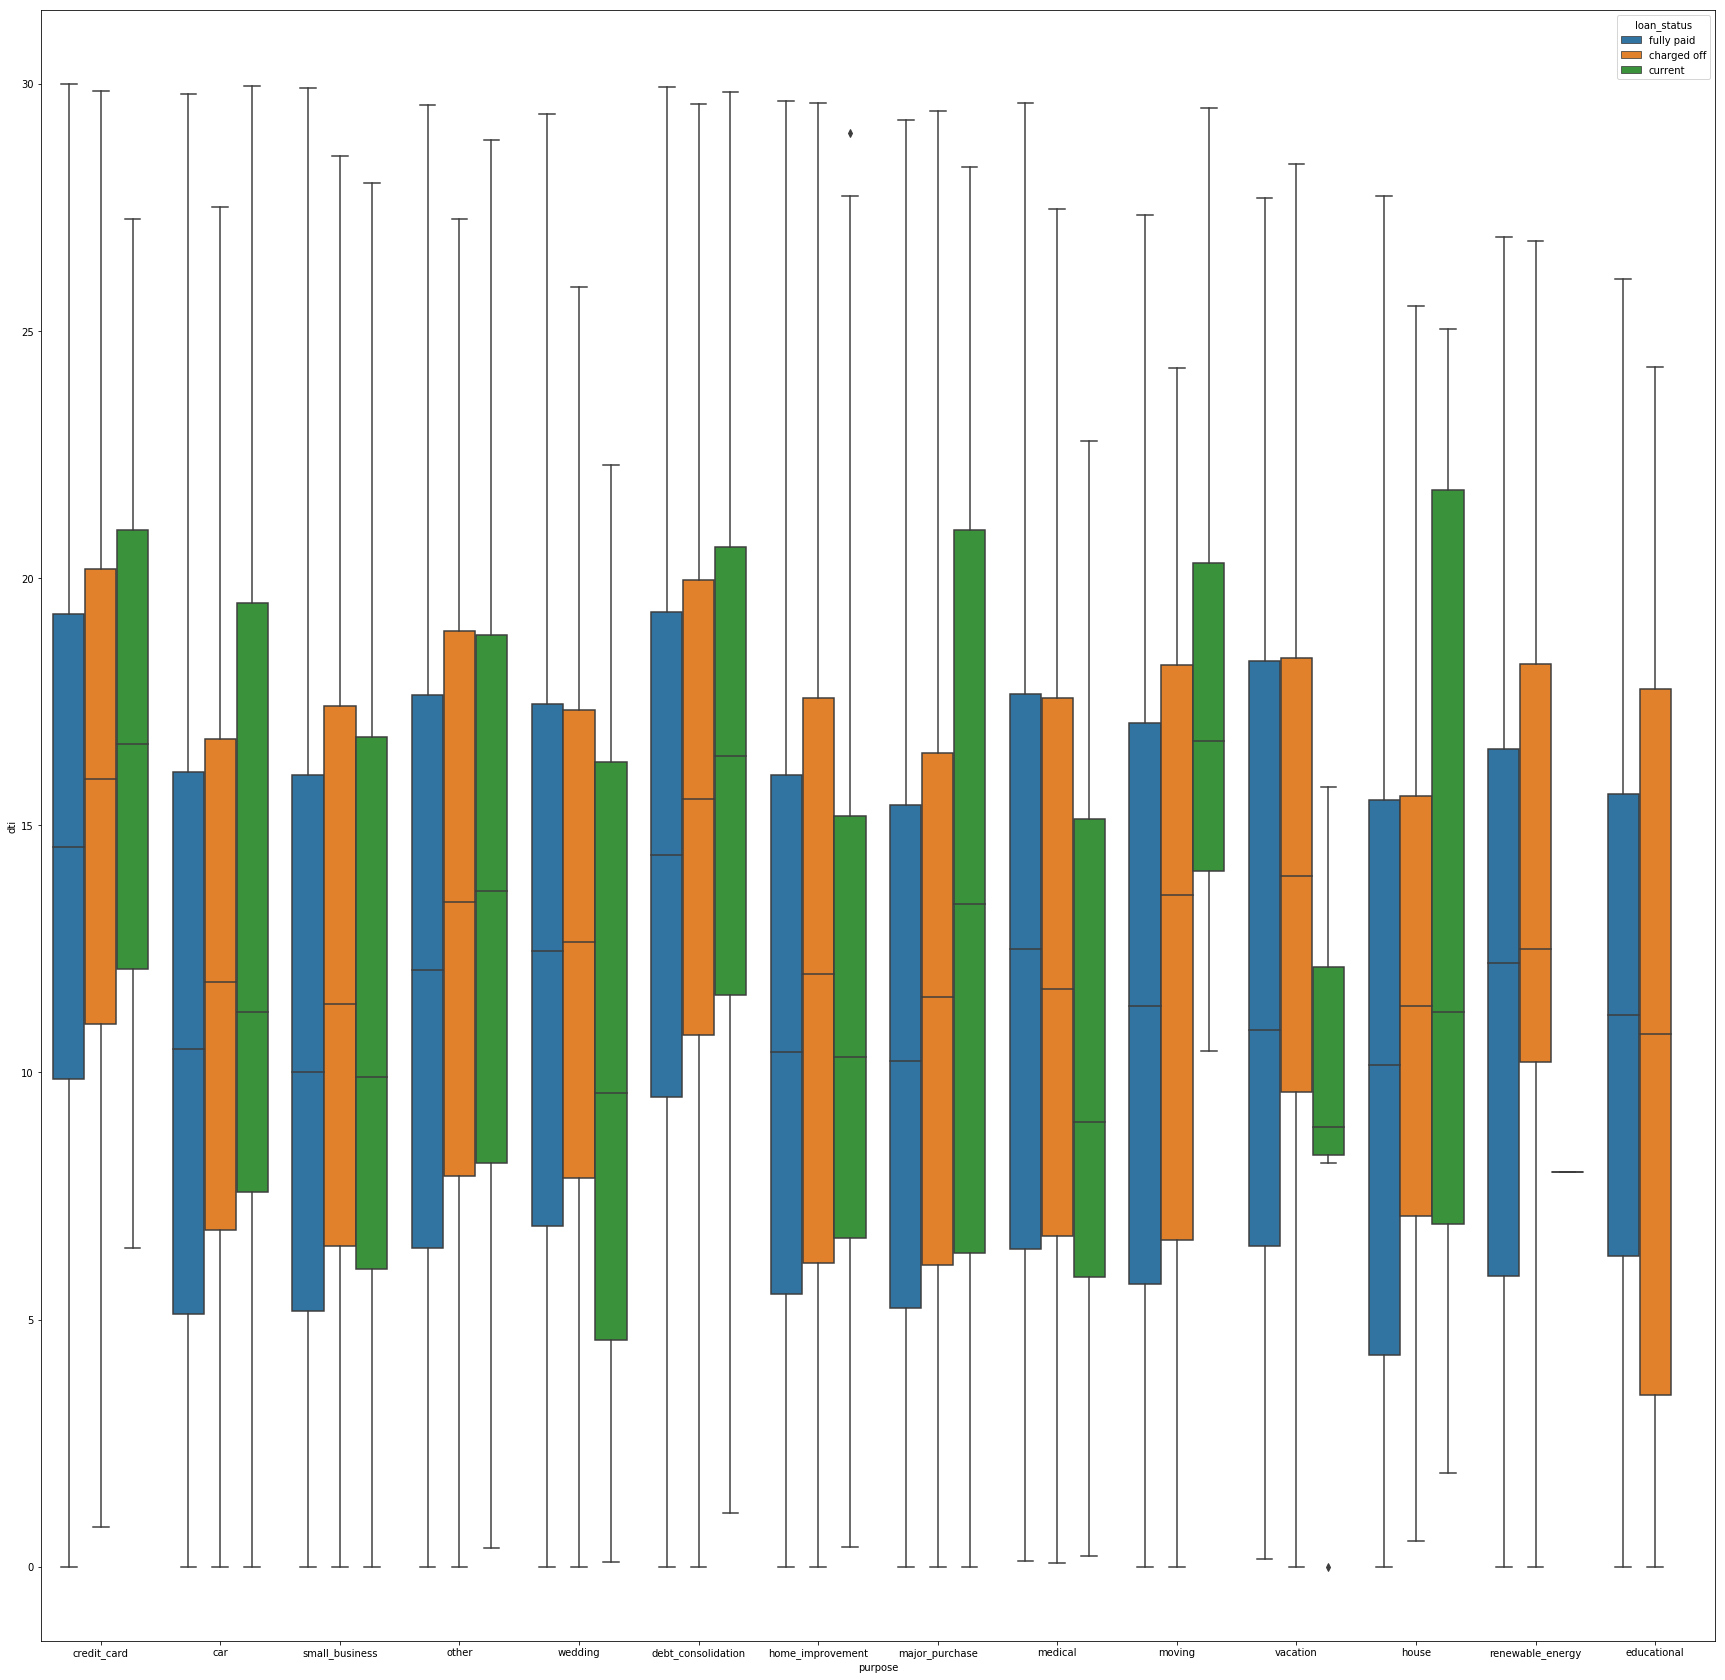

In [200]:
plt.figure(figsize=(30,30))
sns.boxplot(y=loan['dti'],x=loan['purpose'],hue=loan['loan_status'])

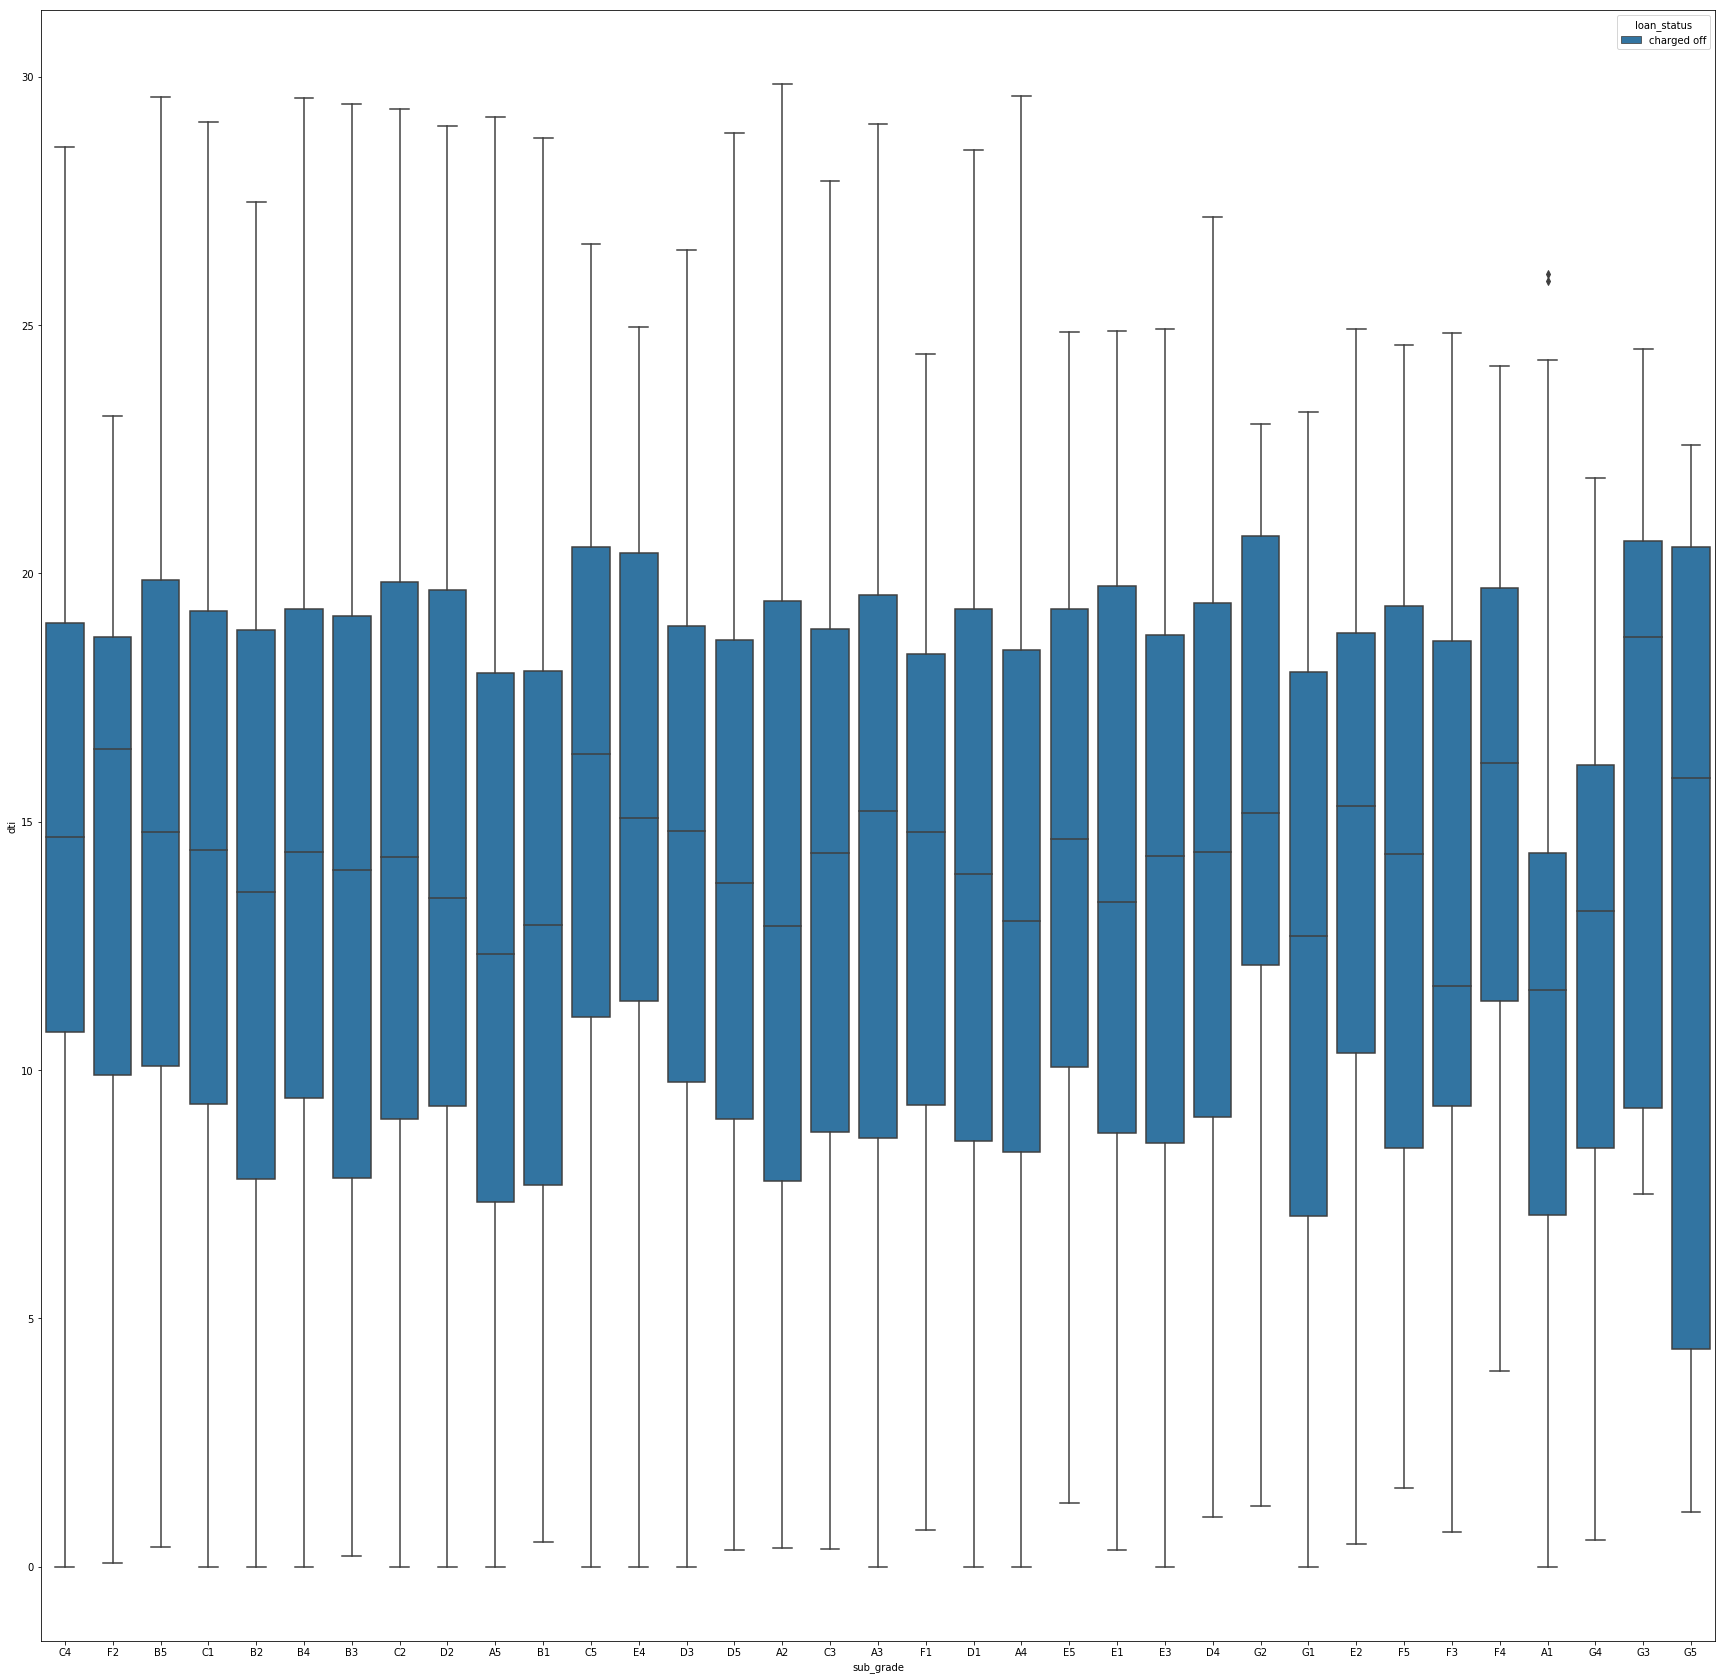

In [201]:
# DTI according to grades of applicants.
plt.figure(figsize=(30,30))
sns.boxplot(y=loan_chargedoff['dti'],x=loan_chargedoff['sub_grade'],hue=loan_chargedoff['loan_status'])

As we can see that subgrades in grades E, F,G with the purpose of like debt_consolidation,credit card,small businesses, others are high DTI which means lower probability of clearing the loans i.e chance of defaulting loans is more.

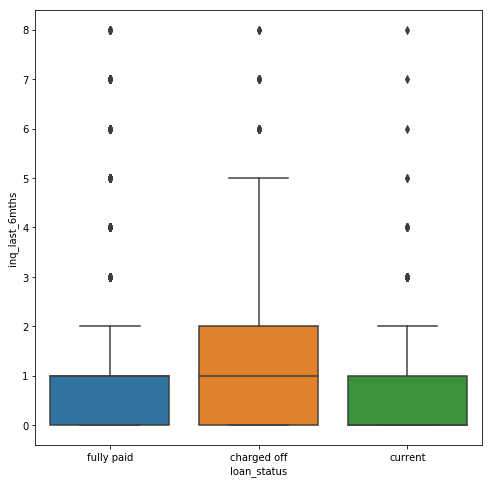

In [202]:
# Based on inquiries happened in last 6 months who have defaulted more of all applicants.

# Between 0 and 2 inquiures most of loan applications falls but still there are more charged off status in inquries>1. But this 
# inquires may also play a role in determining probability of defaulting loan is high or not.

plt.figure(figsize=(8,8))
sns.boxplot(y=loan['inq_last_6mths'],x=loan['loan_status'])

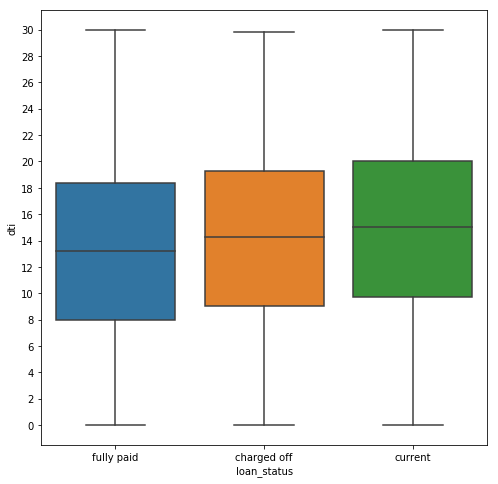

In [203]:
plt.figure(figsize=(8,8))
sns.boxplot(y=loan['dti'],x=loan['loan_status'])
plt.yticks(np.arange(0,32,2))
plt.show()

So, We can say from above analysis thata there are few factors which hepls in determining the loan repayment status i.e whether it will be paid successfully or will it be defaulted. We can say from above plots that 
interest rate, home_ownership, emp_length, grades , subgrades of applicant, DTI of applicant, purpose of the loan, annual income and sometimes location i.e.address state of employee also helps in determining the prob. of loan recovering.

Along with this, revolving balance,payment history etc. helps in determining credit score. But we dont have much information to determine the score as we need more data and factors to get the credit score. SO by credit score we can also determine the loan status.